In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING & EXPLORATION

In [3]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

In [4]:
print(len(data))

2240


In [5]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#Analysing the categorical columns
object_columns = ['Education', 'Marital_Status', 'Dt_Customer']
data_categorical = data.drop(columns=[col for col in data if col not in object_columns])

In [8]:
for col in data_categorical:
    print(data_categorical[col].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-2013' '08-04-2013' '11-09-2012' '14-09-2012'
 '17-03-2013' '05-

In [9]:
#Analysing the numerical columns
data_numerical= data.drop(object_columns, axis=1)
data_numerical.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [10]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# DATA CLEANING

In [11]:
#Remove the rows with null values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [20]:
#Convert Dt_Customer from object to a datetime format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True) 
print(data["Dt_Customer"].dtype)

datetime64[ns]


In [15]:
print(data["Marital_Status"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [16]:
#Create a column called Partner_Count that sums the number of people in partnership based on the Marital_Status column.
data["Partner_Count"]=data["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1,"Alone":1}) 
data["Partner_Count"] = pd.to_numeric(data["Partner_Count"]) 
print(data["Partner_Count"])

0       1
1       1
2       2
3       2
4       2
       ..
2235    2
2236    2
2237    1
2238    2
2239    2
Name: Partner_Count, Length: 2216, dtype: int64


In [17]:
#Encode Eductaion column values
print(data["Education"].value_counts())
data["Education"]=data["Education"].replace({"Basic":1,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":3}) 
data["Education"] = pd.to_numeric(data["Education"])
print(data["Education"])

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
0       2
1       2
2       2
3       2
4       3
       ..
2235    2
2236    3
2237    2
2238    3
2239    3
Name: Education, Length: 2216, dtype: int64


<Figure size 640x480 with 0 Axes>

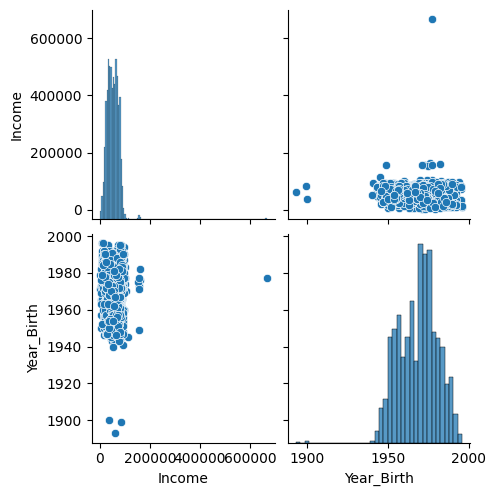

In [22]:
#Plot Income, Year_Birth to see distribution and identify outliers.
To_Plot = ["Income", "Year_Birth"]
plt.figure()
sns.pairplot(data[To_Plot])
plt.show()

In [23]:
#Remove the Year_Birth outliers with YOB above 1920
data = data[(data["Year_Birth"]>1920)]

#Remove the Income outliers with income above 600000
data = data[(data["Income"]<600000)]

<Figure size 640x480 with 0 Axes>

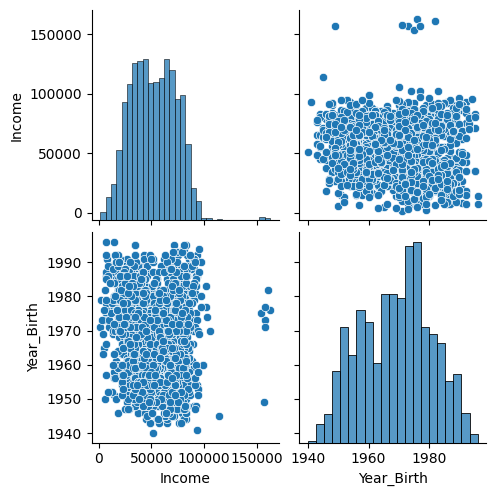

In [25]:
To_Plot = ["Income", "Year_Birth"]
plt.figure()
sns.pairplot(data[To_Plot])
plt.show()

In [24]:
print(len(data))

2212


In [26]:
#Drop columns:Marital_Status, Z_CostContract, Z_Revenue and ID.
to_drop = ["Marital_Status", "Z_CostContact", "Z_Revenue", "ID"]
data = data.drop(to_drop, axis=1) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2212 non-null   int64         
 1   Education            2212 non-null   int64         
 2   Income               2212 non-null   float64       
 3   Kidhome              2212 non-null   int64         
 4   Teenhome             2212 non-null   int64         
 5   Dt_Customer          2212 non-null   datetime64[ns]
 6   Recency              2212 non-null   int64         
 7   MntWines             2212 non-null   int64         
 8   MntFruits            2212 non-null   int64         
 9   MntMeatProducts      2212 non-null   int64         
 10  MntFishProducts      2212 non-null   int64         
 11  MntSweetProducts     2212 non-null   int64         
 12  MntGoldProds         2212 non-null   int64         
 13  NumDealsPurchases    2212 non-nul

# FEATURE ENGINEERING

In [28]:
#Derive column Age from Year_Birth
data["Age"] = 2024-data["Year_Birth"] 
print(data["Age"])

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2212, dtype: int64


In [29]:
#Derive column Children by adding together Kidhome and Teenhome
data["Children"]=data["Kidhome"]+data["Teenhome"]
print(data["Children"])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2212, dtype: int64


In [30]:
#Derive column Family_Size by adding together Parent_Count and Children
data["Family_Size"] = data["Partner_Count"] + data["Children"] 
print(data["Family_Size"])

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2212, dtype: int64


In [31]:
#Derive column Is_Parent by analysing Children
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
print(data["Is_Parent"])

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2212, dtype: int64


In [32]:
#Derive Spend that is the sum of all spend over all categories
data["Spend"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
print(data["Spend"])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spend, Length: 2212, dtype: int64


In [34]:
#Derive Customer_For stores length of time the customer has been registered (recorded in nanoseconds)
from datetime import datetime

days = []
d1 = datetime.now()
for i in data["Dt_Customer"]:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
print(data["Customer_For"]) 

0       376793940596535000
1       329273940596535000
2       346467540596535000
3       331520340596535000
4       333421140596535000
               ...        
2235    352429140596535000
2236    321152340596535000
2237    332902740596535000
2238    332989140596535000
2239    373251540596535000
Name: Customer_For, Length: 2212, dtype: int64


In [35]:
#Drop redundant columns: Year_Birth and Dt_Customer
to_drop = ["Dt_Customer", "Year_Birth"]
data = data.drop(to_drop, axis=1)

In [37]:
data.describe() #no more outliers (compare mean to min & max)

Education         Income      Kidhome     Teenhome      Recency  \
count  2212.000000    2212.000000  2212.000000  2212.000000  2212.000000   
mean      2.268083   51958.810579     0.441682     0.505877    49.019439   
std       0.651348   21527.278844     0.536955     0.544253    28.943121   
min       1.000000    1730.000000     0.000000     0.000000     0.000000   
25%       2.000000   35233.500000     0.000000     0.000000    24.000000   
50%       2.000000   51371.000000     0.000000     0.000000    49.000000   
75%       3.000000   68487.000000     1.000000     1.000000    74.000000   
max       3.000000  162397.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2212.000000  2212.000000      2212.000000      2212.000000   
mean    305.287523    26.329566       167.029837        37.648734   
std     337.322940    39.744052       224.254493        54.772033   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     175.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  AcceptedCmp2     Complain     Response  \
count       2212.000000  ...   2212.000000  2212.000000  2212.000000   
mean          27.046564  ...      0.013562     0.009042     0.150542   
std           41.090991  ...      0.115691     0.094678     0.357683   
min            0.000000  ...      0.000000     0.000000     0.000000   
25%            1.000000  ...      0.000000     0.000000     0.000000   
50%            8.000000  ...      0.000000     0.000000     0.000000   
75%           33.000000  ...      0.000000     0.000000     0.000000   
max          262.000000  ...      1.000000     1.000000     1.000000   

       Partner_Count          Age     Children  Family_Size    Is_Parent  \
count    2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   
mean        1.645570    55.086347     0.947559     2.593128     0.714286   
std         0.478449    11.701599     0.749466     0.906236     0.451856   
min         1.000000    28.000000     0.000000     1.000000     0.000000   
25%         1.000000    47.000000     0.000000     2.000000     0.000000   
50%         2.000000    54.000000     1.000000     3.000000     1.000000   
75%         2.000000    65.000000     1.000000     3.000000     1.000000   
max         2.000000    84.000000     3.000000     5.000000     1.000000   

             Spend  Customer_For  
count  2212.000000  2.212000e+03  
mean    607.268083  3.500717e+17  
std     602.513364  1.749556e+16  
min       5.000000  3.195107e+17  
25%      69.000000  3.350627e+17  
50%     397.000000  3.502691e+17  
75%    1048.000000  3.652163e+17  
max    2525.000000  3.799043e+17  

[8 rows x 30 columns]

In [38]:
data.info() #all data is now numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

<AxesSubplot:>

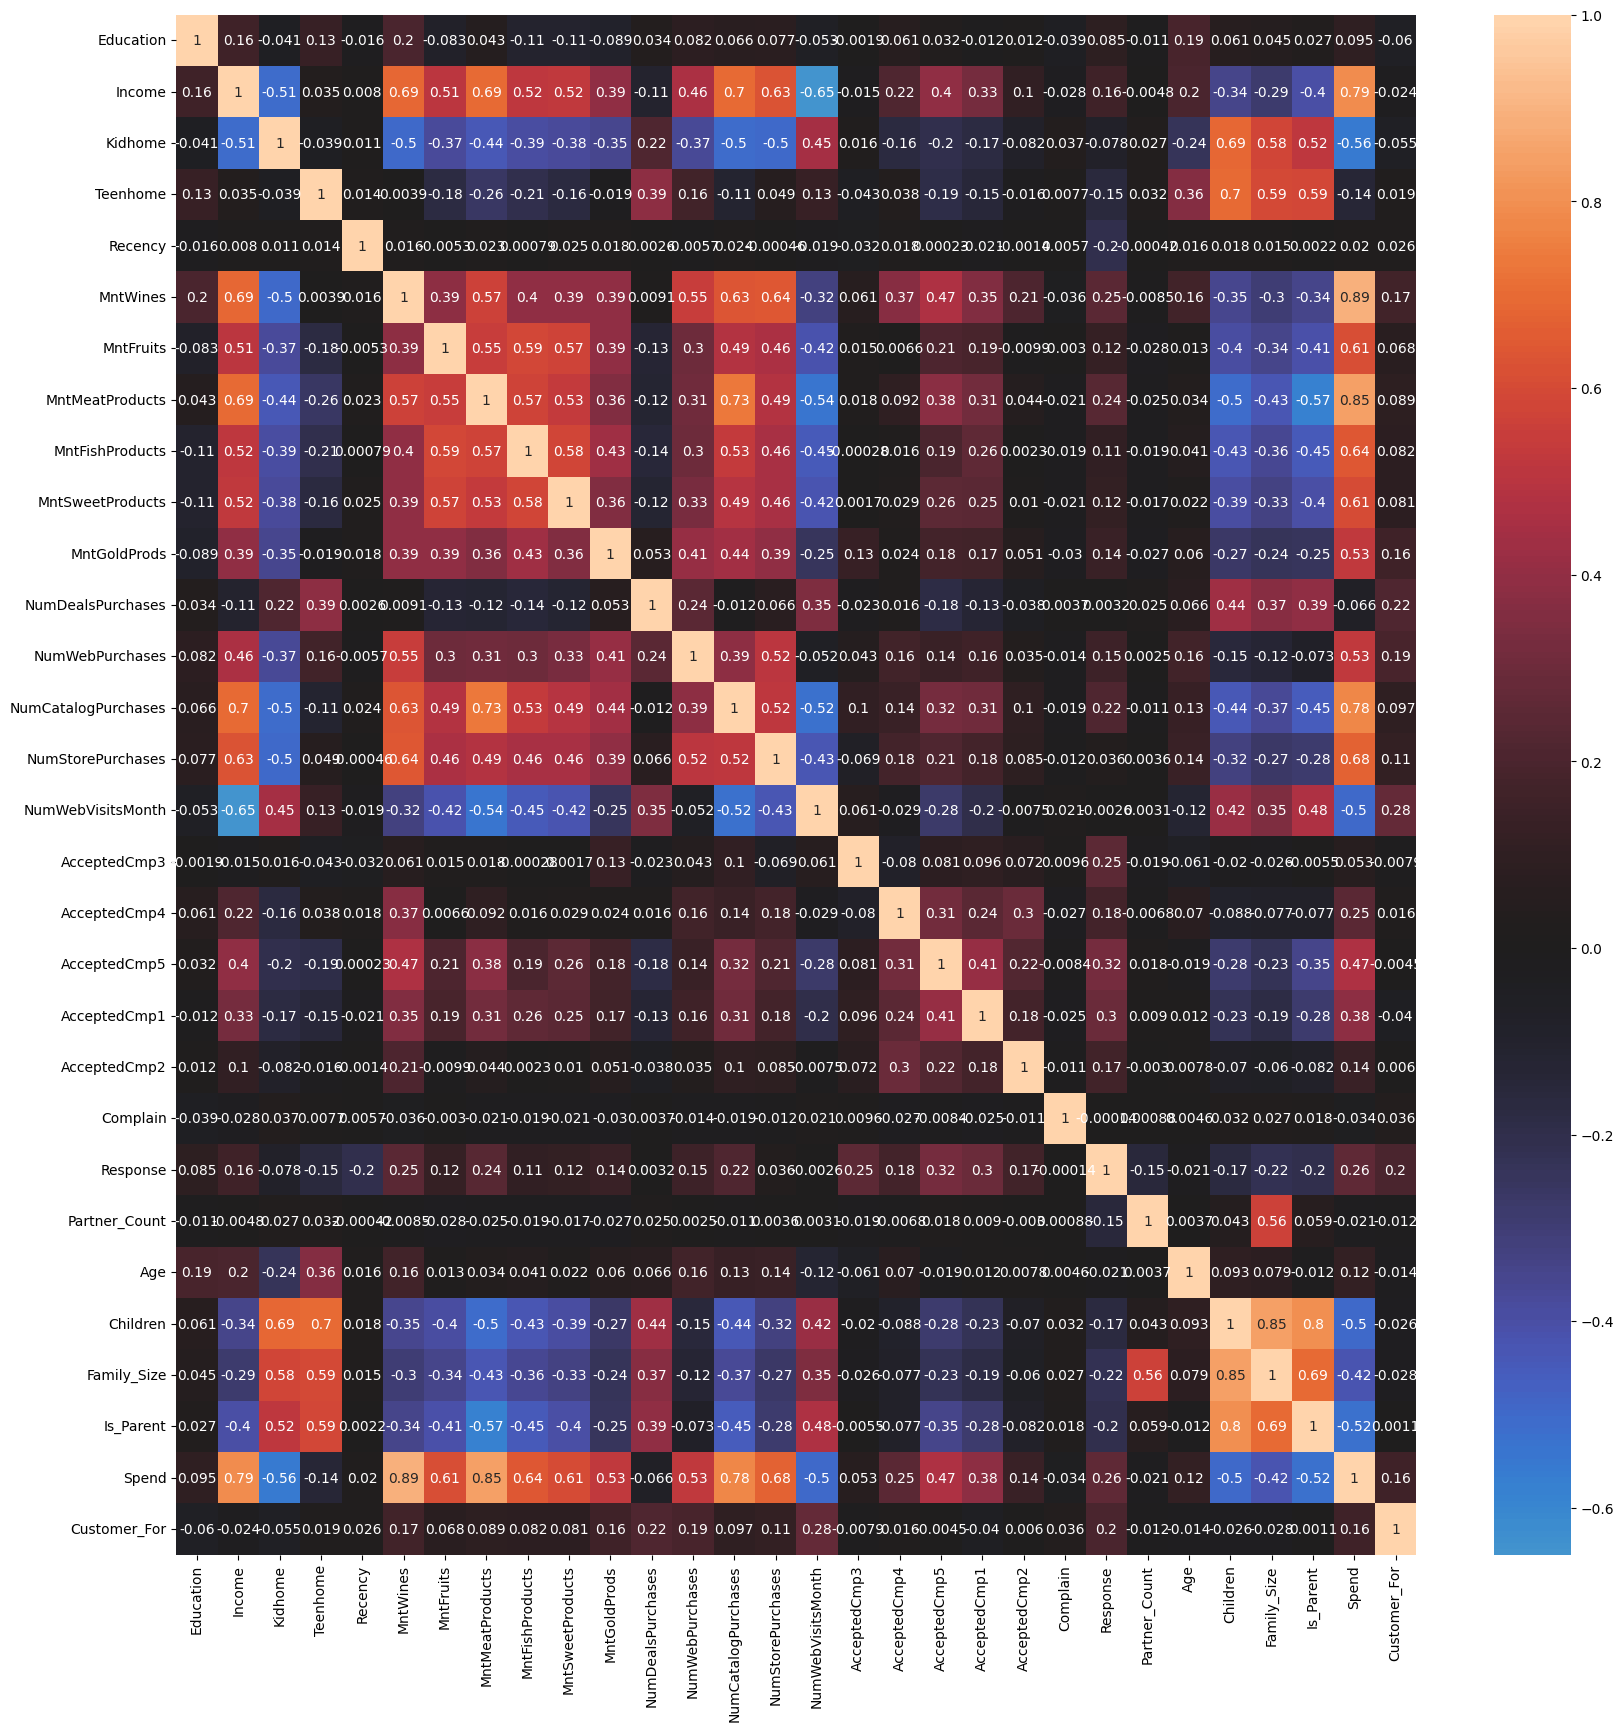

In [40]:
#trying to see if any two columns are highly correlated
#one of such columns must be dropped to avoid redundancy
corrmat= data.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(corrmat,annot=True, center=0)

# DATA PREPROCESSING

In [41]:
df = data.copy()

In [42]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [44]:
#Data Scaling (z-score normalisation)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print(scaled_df)

      Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1     -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2     -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3     -0.411675 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4      1.123949  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   
...         ...       ...       ...       ...       ...       ...        ...   
2207  -0.411675  0.430444 -0.822754  0.908097 -0.104347  1.197084   0.419540   
2208   1.123949  0.560123  2.902796  0.908097  0.241237  0.298631  -0.662628   
2209  -0.411675  0.233347 -0.822754 -0.929699  1.450778  1.787156   0.545373   
2210   1.123949  0.803172 -0.822754  0.908097 -1.417564  0.363866   0.092373   
2211   1.123949  0.042290  1.040021  0.908097 -0.311697 -0.656159  -0.587128   

      MntMeatProducts  MntFishProducts 

# DIMENSIONALITY REDUCTION

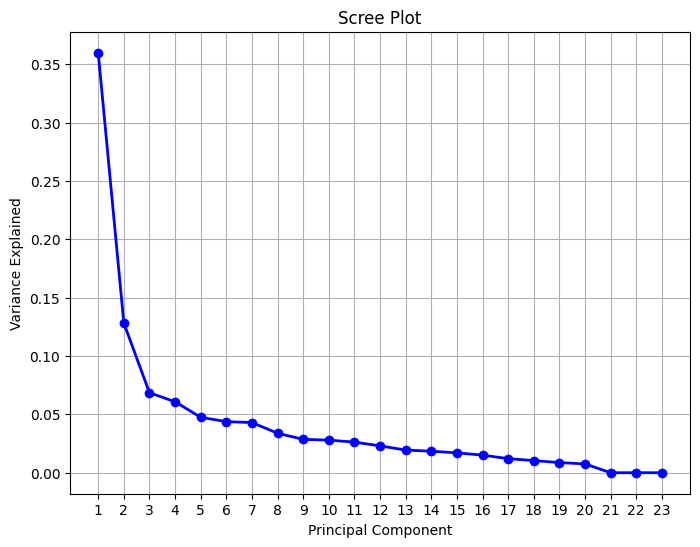

In [54]:
#Perform Principal Component Analysis and fit it to the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_fit = pca.fit(scaled_df)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [48]:
#Perform PCA using 3 principal components
pca = PCA(n_components=3)
pca_fit = pca.fit(scaled_df)

In [49]:
#Fit the PCA value to the dataset and verify.
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  3.212219e-17  2.877827 -5.952497 -2.539815 -0.770318  2.416599   
col2  2212.0 -2.569775e-17  1.717527 -4.270121 -1.323613 -0.160948  1.242385   
col3  2212.0  1.927331e-17  1.255986 -3.966071 -0.841095 -0.011225  0.829297   

           max  
col1  7.482261  
col2  6.302398  
col3  5.930381

# CLUSTER ANALYSIS

In [51]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

In [52]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)

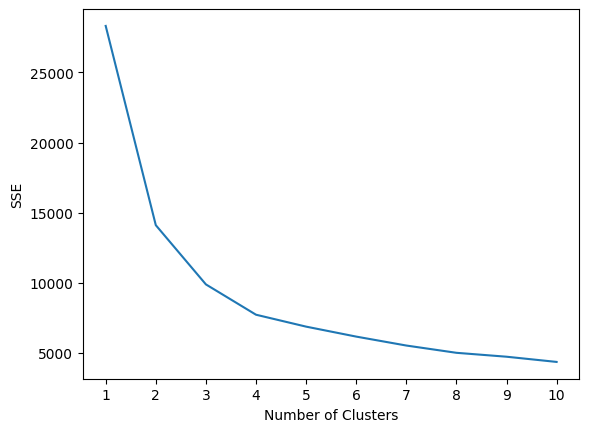

In [53]:
##Identify the ideal number of CLUSTERS using Elbow Method
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE") #sum of squared errors
plt.show()

In [ ]:
## ELBOW AT 4 CLUSTERS

In [55]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)

In [56]:
FP_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = FP_AC

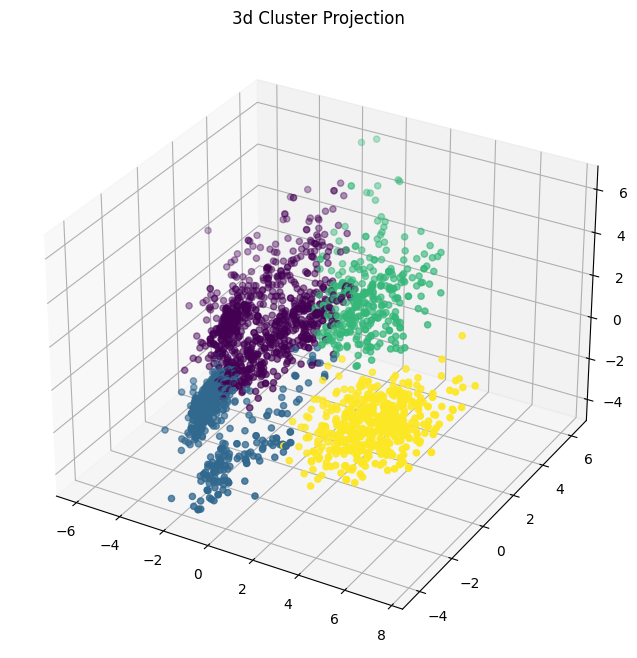

In [57]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection ='3d')
z = PCA_ds["col2"]
x = PCA_ds["col1"]
y = PCA_ds["col2"]
c=PCA_ds["Clusters"]
ax.scatter(x, y, z, c=c)
ax.set_title('3d Cluster Projection')
plt.show()

# CLUSTER DEMOGRAPHIC EVALUATION

In [58]:
#Add the results of the Clustering to a new column to df
df["Clusters"] = FP_AC

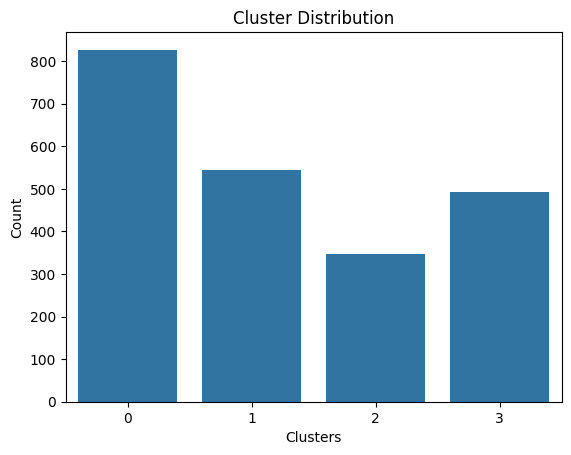

In [67]:
#Plot the distribution of the clusters
sns.countplot(x="Clusters", data=df)
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title("Cluster Distribution")
plt.show()


<Figure size 640x480 with 0 Axes>

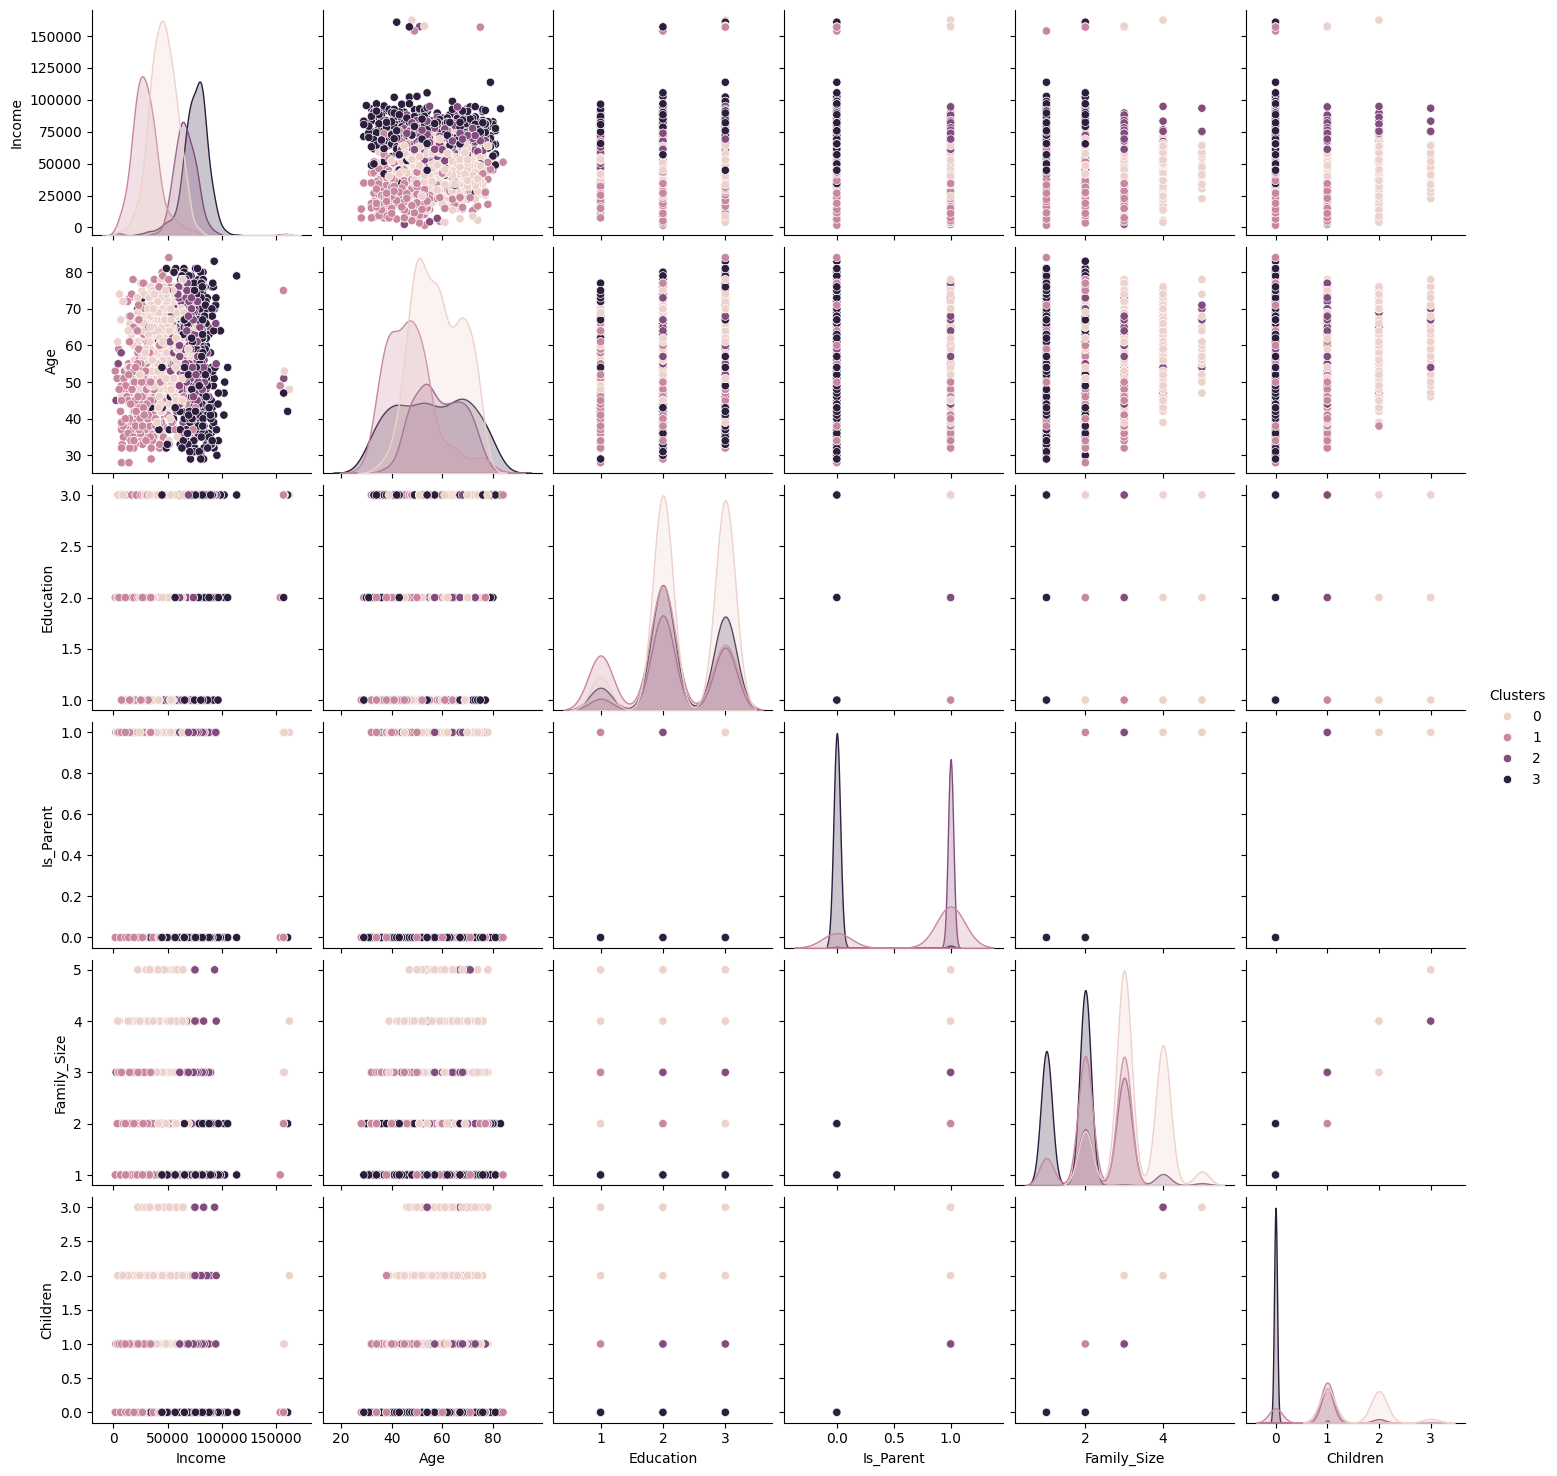

In [68]:
#correlation plot with the different demographic columns grouped by cluster

To_Plot = ["Income", "Age", "Education", "Is_Parent", "Family_Size", "Children", "Clusters"]
plt.figure()
sns.pairplot(df[To_Plot], hue="Clusters")
plt.show()

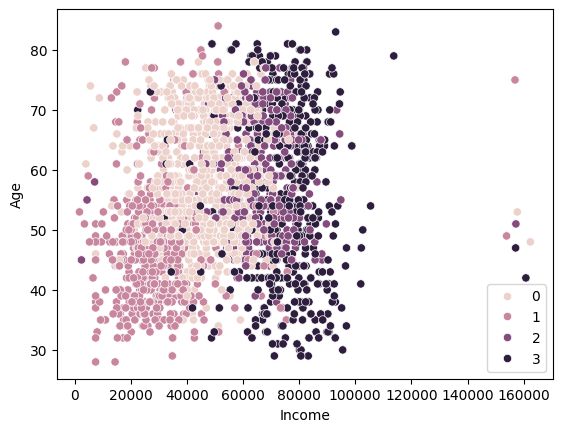

In [69]:
pl = sns.scatterplot(data = df,x=df["Income"], y=df["Age"],hue=df["Clusters"])
plt.legend()
plt.show()

My Observations:

Cluster 0 is older, middle earner

Cluster 1 is younger, low earners

Cluster 2 is old (similar to 0), middle earner

Cluster 3 is more evenly distributed among age, high earners

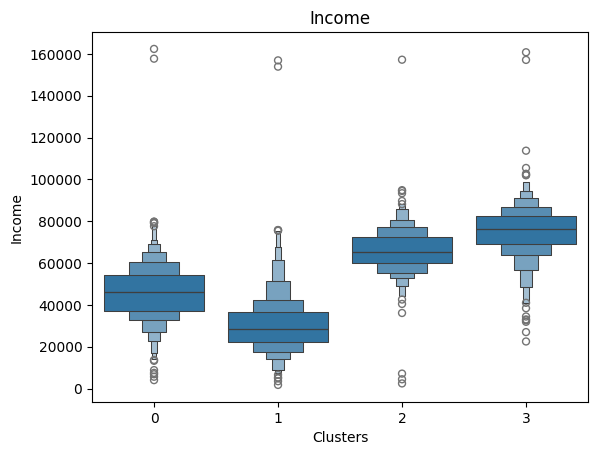

In [72]:
#Plot income by cluster
plt.figure()
pl=sns.boxenplot(y=df["Income"],x=df["Clusters"])
pl.set_title("Income")
plt.show()

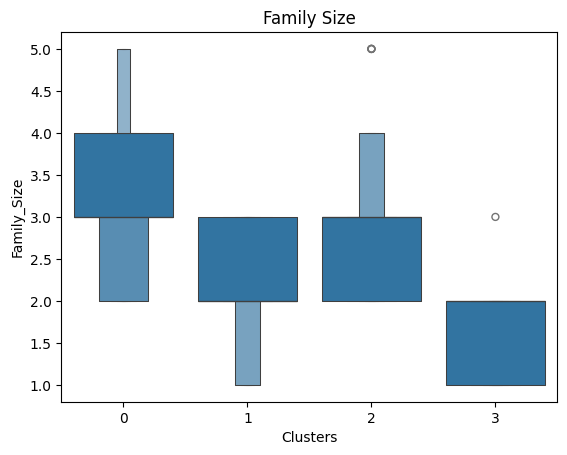

In [73]:
#Plot family size by cluster
plt.figure()
pl=sns.boxenplot(y=df["Family_Size"],x=df["Clusters"])
pl.set_title("Family Size")
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='count'>

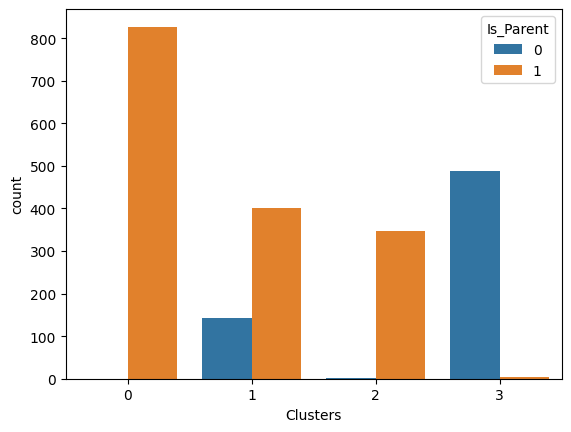

In [76]:
#Plot 'Is_Parent' by cluster

sns.countplot(x=df["Clusters"], hue=df["Is_Parent"])

Clusters 0 and 2 are (except for a couple exceptions) exclusively parents

Cluster 3 is exclusively not parents, again with a few exceptions

Cluster 1 is mixed with approx. 1/4th not being parents.

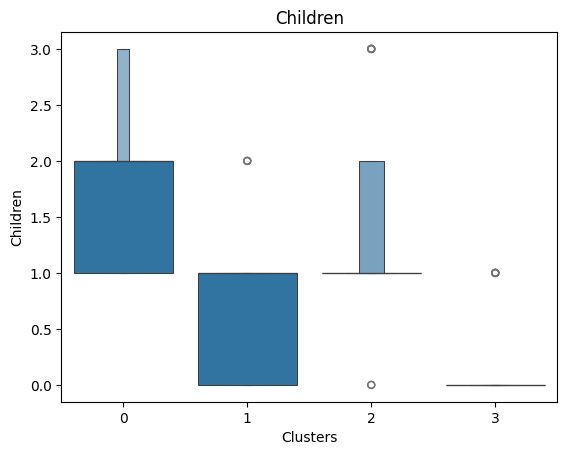

In [77]:
#Plot number of children by cluster

plt.figure()
pl=sns.boxenplot(y=df["Children"],x=df["Clusters"])
pl.set_title("Children")
plt.show()

Cluster 3, with a couple exceptions, is childless

Cluster 0 entirely have children and generally 1 or 2

Cluster 2 is almost exclusively with children, mostly with 1 child but a fair few have 2

Cluster 1 is mixed but generally have 1 child if they have children at all.

# CLUSTER SHOPPING HABITS EVALUATION

<Figure size 640x480 with 0 Axes>

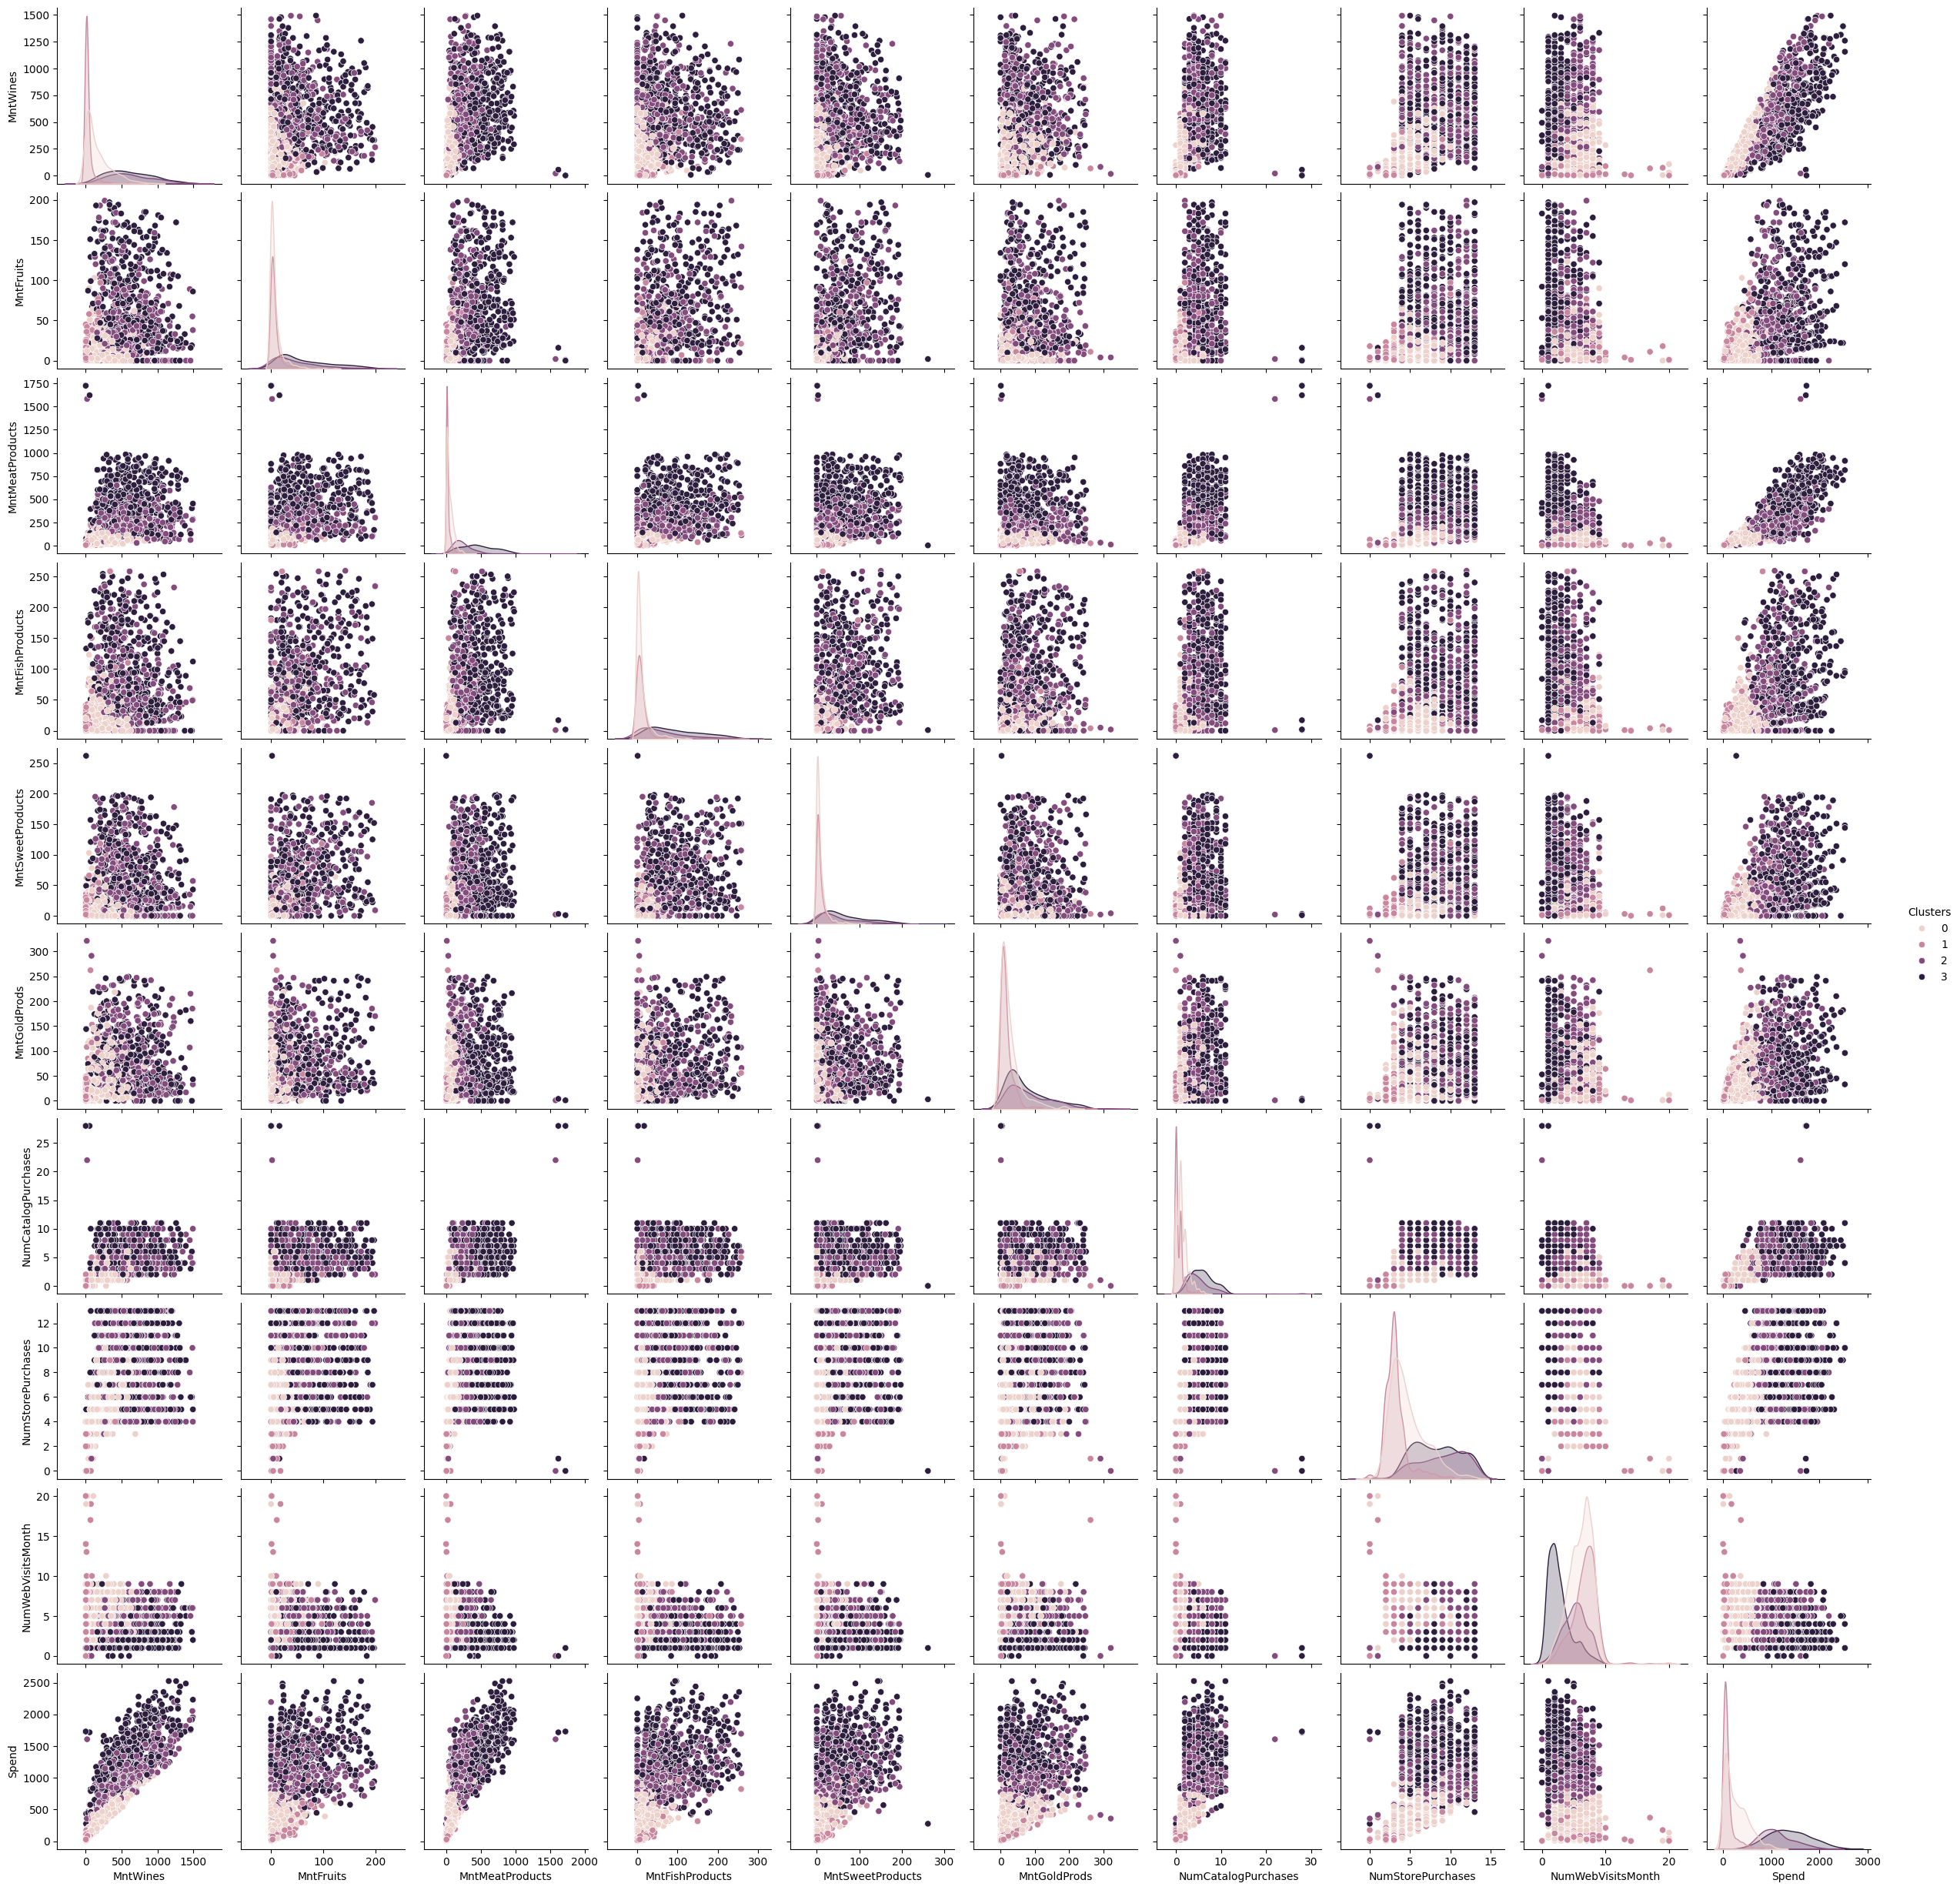

In [79]:
To_Plot = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Spend", "Clusters"]
plt.figure()
sns.pairplot(df[To_Plot], hue="Clusters")
plt.show()

The more each cluster spends, the more of each product they buy and the more web, catalog and store purchases they make.

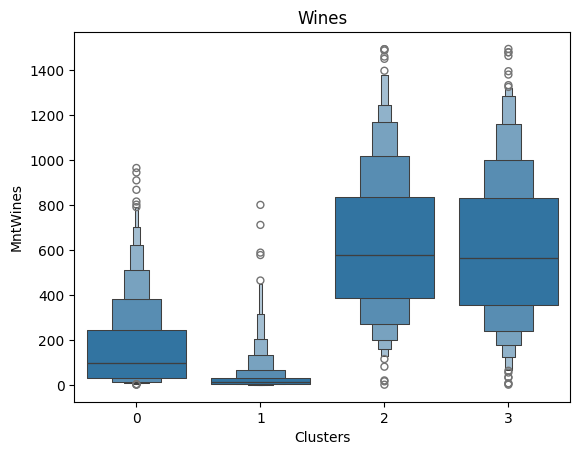

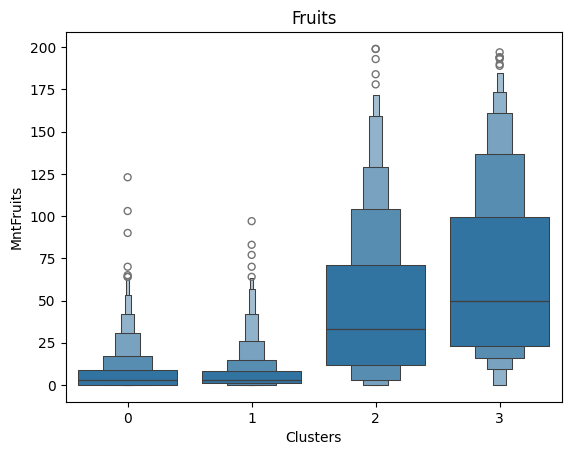

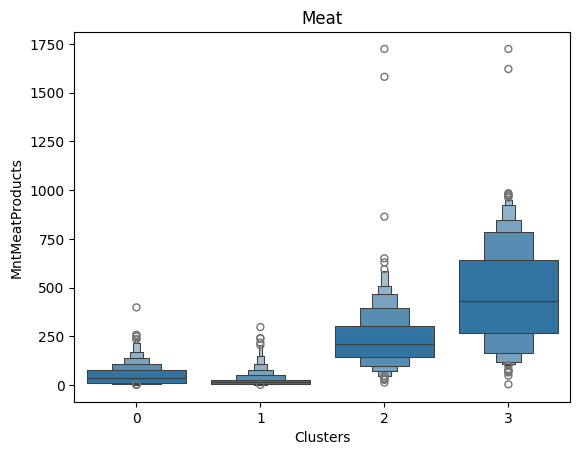

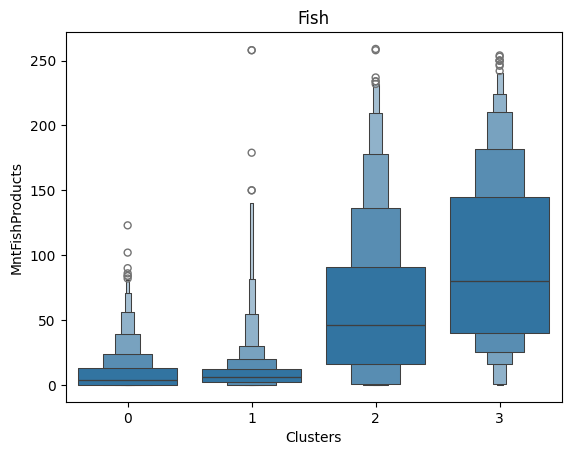

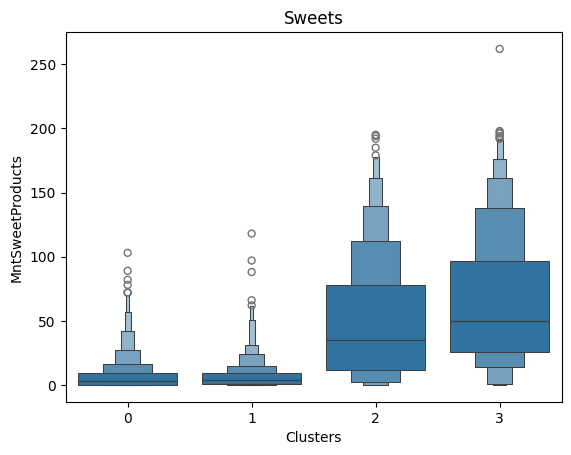

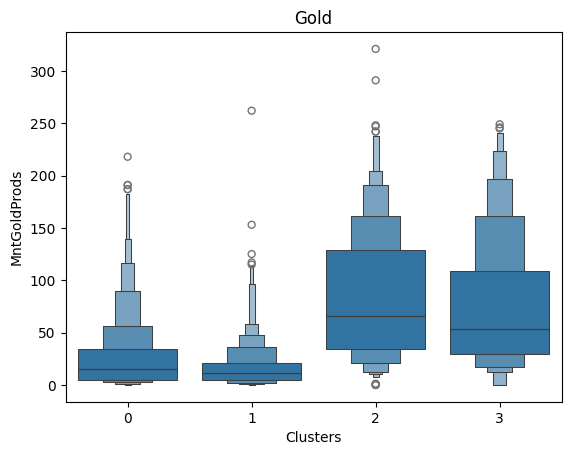

In [81]:
plt.figure()
pl=sns.boxenplot(y=df["MntWines"],x=df["Clusters"])
pl.set_title("Wines")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["MntFruits"],x=df["Clusters"])
pl.set_title("Fruits")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["MntMeatProducts"],x=df["Clusters"])
pl.set_title("Meat")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["MntFishProducts"],x=df["Clusters"])
pl.set_title("Fish")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["MntSweetProducts"],x=df["Clusters"])
pl.set_title("Sweets")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["MntGoldProds"],x=df["Clusters"])
pl.set_title("Gold")
plt.show()

We can see that clusters 2 and 3 spend much more across all categories, this makes sense as they have the highest earners.

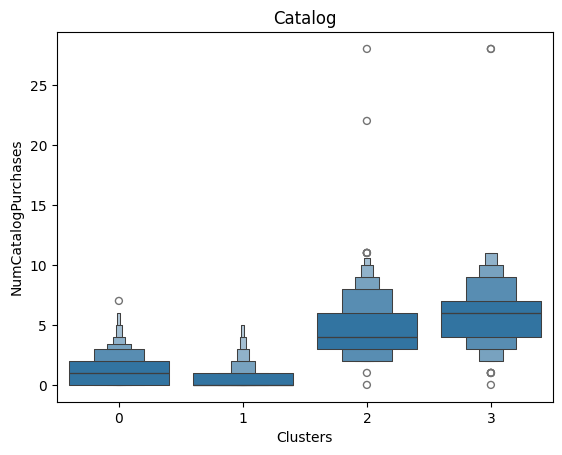

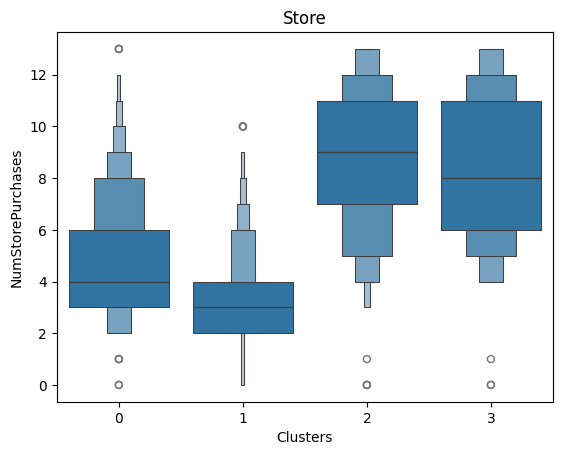

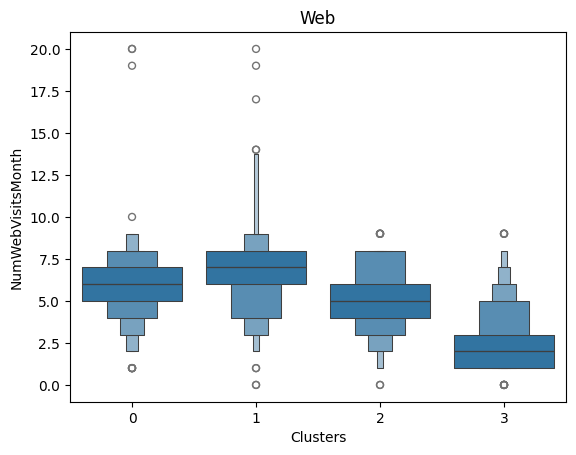

In [82]:
plt.figure()
pl=sns.boxenplot(y=df["NumCatalogPurchases"],x=df["Clusters"])
pl.set_title("Catalog")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["NumStorePurchases"],x=df["Clusters"])
pl.set_title("Store")
plt.show()
 
plt.figure()
pl=sns.boxenplot(y=df["NumWebVisitsMonth"],x=df["Clusters"])
pl.set_title("Web")
plt.show()

We can learn Cluster 3 rarely visits the website, where as the other 3 clusters visit the website with Cluster 1 visiting the most.

All clusters visit the store proportionally to their spend.

Clusters 0 and 1 almost never use the catalog and Cluster 3 uses it the most.

## Summarizing our learnings

Cluster 0: Comprises older, middle earners who are predominantly parents with 1 or 2 children. They show moderate spending but rarely use the catalog and visit the store proportionally to their spending.

Cluster 1: Includes younger, low earners with a mixed parental status, generally having 1 child if they have any. They are the most frequent website visitors, spend less overall, and almost never use the catalog.

Cluster 2: Represents older, middle earners similar to Cluster 0, who are almost exclusively parents, mostly with 1 or 2 children. They exhibit higher spending across categories and have moderate website usage, rarely using the catalog.

Cluster 3: Contains more evenly distributed ages, high earners who are typically childless, except for a few. They spend the most, visit the website less frequently, and use the catalog the most.

Implications: Cluster 1 might benefit from promotions that drive more catalog engagement, while Cluster 3 could be targeted with offers that increase website visits.